In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\shishir\\Desktop\\Untitled Folder'

In [3]:
os.chdir('G:\\Downloads')

In [4]:
dataset = pd.read_csv('Movie-Ratings.csv')
dataset.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                         559 non-null object
Genre                        559 non-null object
Rotten Tomatoes Ratings %    559 non-null int64
Audience Ratings %           559 non-null int64
Budget (million $)           559 non-null int64
Year of release              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [6]:
dataset.columns = ['Film', 'Genre', 'CriticRatings', 'AudienceRatings',
       'Budget', 'ReleaseYear']

In [7]:
dataset.Film=dataset.Film.astype('category')

In [8]:
dataset.Genre=dataset.Genre.astype('category')
dataset.ReleaseYear=dataset.ReleaseYear.astype('category')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null category
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
Budget             559 non-null int64
ReleaseYear        559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("paper")
sns.set_style('darkgrid')
plt.style.use('seaborn')
plt.rcParams['figure.figsize']=10,4
# plt.style.available

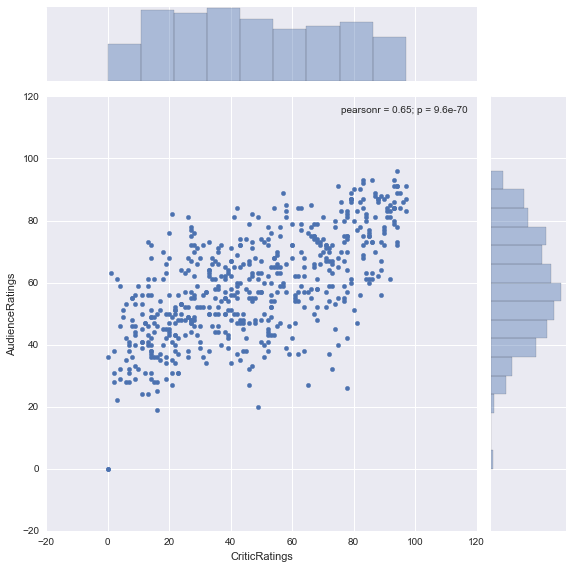

In [24]:
sns.jointplot(data = dataset,x = 'CriticRatings',y = 'AudienceRatings',size=8)

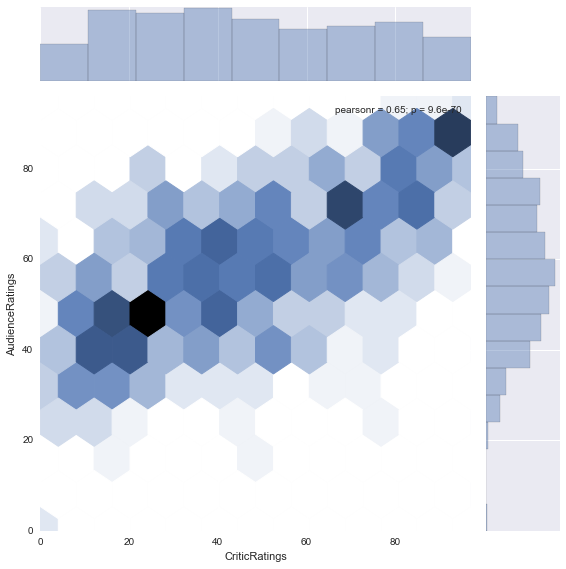

In [25]:
sns.jointplot(data = dataset,x = 'CriticRatings',y = 'AudienceRatings',kind = 'hex',size=8)

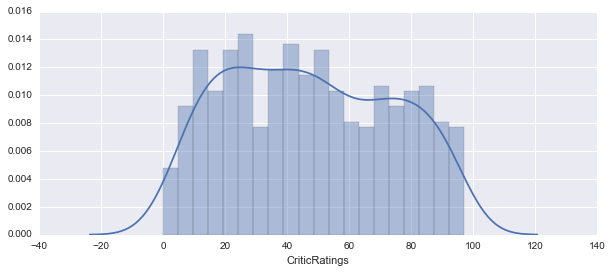

In [26]:
sns.distplot(dataset.CriticRatings,bins = 20)

(array([ 13.,  25.,  36.,  28.,  36.,  39.,  21.,  32.,  37.,  31.,  36.,
         28.,  22.,  21.,  29.,  25.,  28.,  29.,  22.,  21.]),
 array([  0.  ,   4.85,   9.7 ,  14.55,  19.4 ,  24.25,  29.1 ,  33.95,
         38.8 ,  43.65,  48.5 ,  53.35,  58.2 ,  63.05,  67.9 ,  72.75,
         77.6 ,  82.45,  87.3 ,  92.15,  97.  ]),
 <a list of 20 Patch objects>)

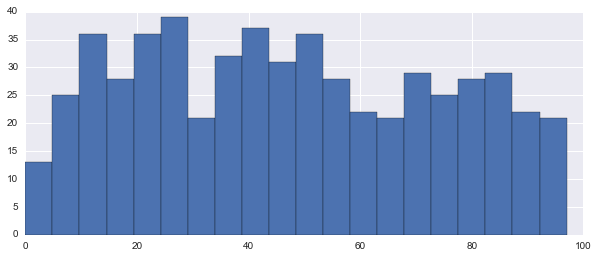

In [27]:
plt.hist(dataset.CriticRatings,bins=20)

In [15]:
#Stacked Histograms

In [28]:
list_gen = dataset.Genre.unique()

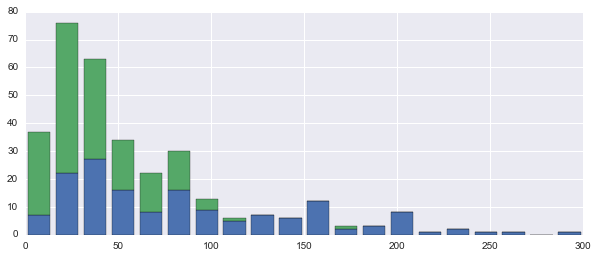

In [29]:
# dataset[dataset.Genre=='Action'].CriticRatings
plt.hist([dataset[dataset.Genre=='Action'].Budget,dataset[dataset.Genre=='Comedy'].Budget],stacked=True,bins=20)
plt.show()

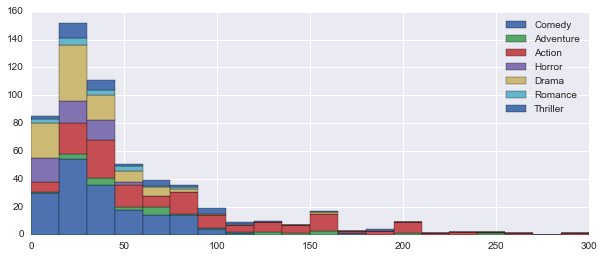

In [30]:
list1 = []
my_label = []
for gen in list_gen:
    a1 = dataset[dataset.Genre==gen].Budget
    list1.append(a1)
    my_label.append(gen)
plt.hist(list1,stacked = True,bins=20,rwidth=1,label=my_label)
plt.legend(my_label)
plt.show()

In [31]:
#KDE plot

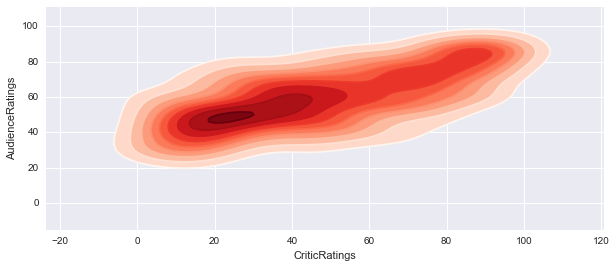

In [32]:
sns.kdeplot(dataset.CriticRatings,dataset.AudienceRatings,shade=True,shade_lowest=False,cmap = 'Reds')
sns.kdeplot(dataset.CriticRatings,dataset.AudienceRatings,cmap = 'Reds')

(-10, 120)

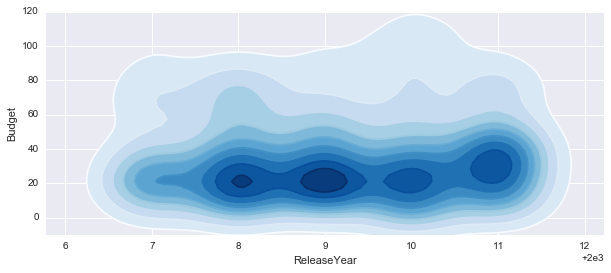

In [33]:
a = sns.kdeplot(dataset.ReleaseYear,dataset.Budget,shade=True,shade_lowest=False,cmap = 'Blues')
a = sns.kdeplot(dataset.ReleaseYear,dataset.Budget,cmap = 'Blues')
a.set_ylim(-10,120)

In [34]:
#Subplots

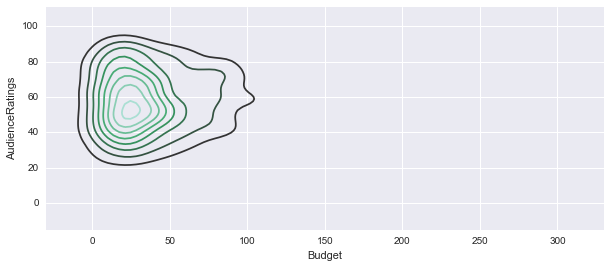

In [35]:
k1 = sns.kdeplot(dataset.Budget,dataset.AudienceRatings)

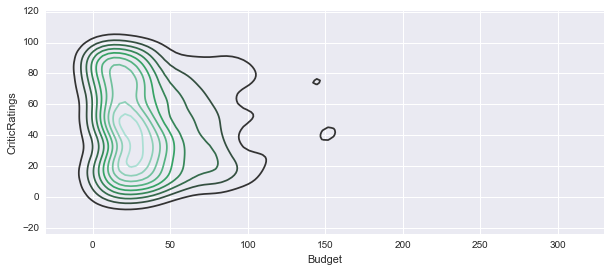

In [36]:
k2 = sns.kdeplot(dataset.Budget,dataset.CriticRatings)

(-20, 160)

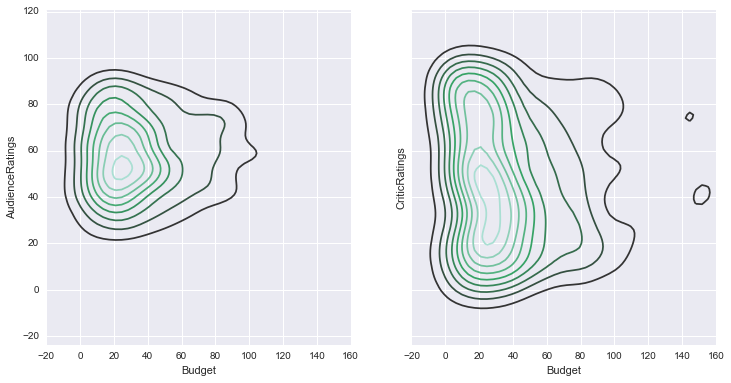

In [37]:
# sns.set_style('dark')
f , ax = plt.subplots(ncols=2,nrows=1,figsize=(12,6),sharex=True,sharey=True)
k1 = sns.kdeplot(dataset.Budget,dataset.AudienceRatings,ax=ax[0])
k2 = sns.kdeplot(dataset.Budget,dataset.CriticRatings,ax=ax[1])
k1.set_xlim(-20,160)

In [38]:
#Boxplots vs Violin plots

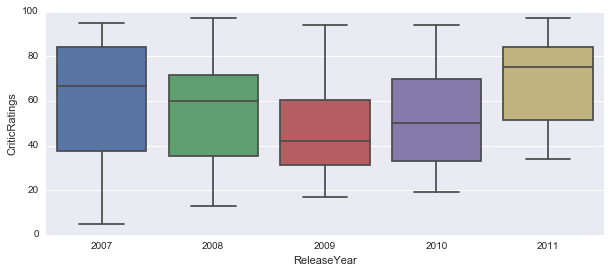

In [39]:
# sns.boxplot(data=dataset,x=dataset.Genre,y=dataset.CriticRatings)
sns.boxplot(data=dataset[dataset.Genre=='Drama'],x='ReleaseYear',y='CriticRatings')

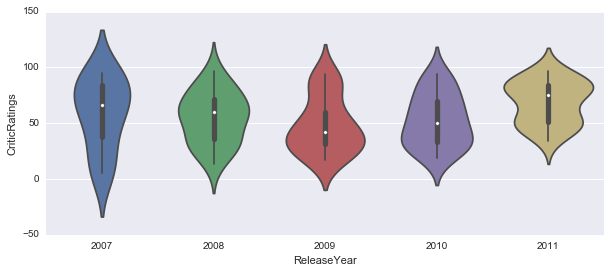

In [40]:
# sns.violinplot(data=dataset,x=dataset.Genre,y=dataset.CriticRatings)
sns.violinplot(data=dataset[dataset.Genre=='Drama'],x='ReleaseYear',y='CriticRatings')

In [41]:
#facet grid

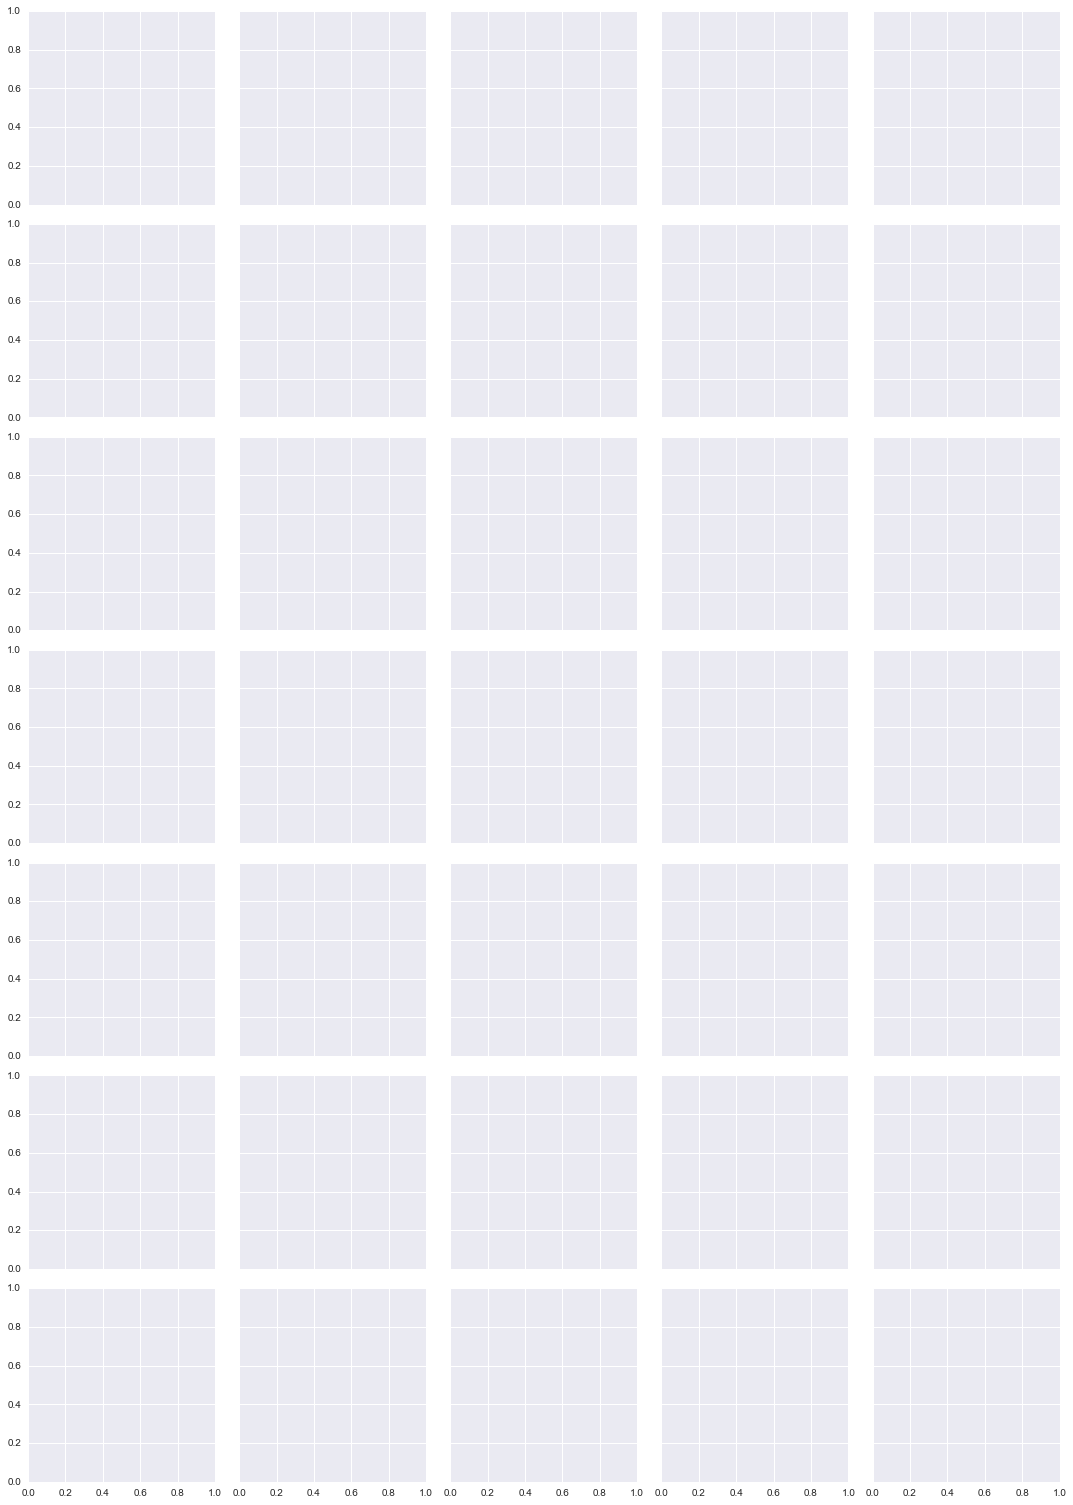

In [42]:
g=sns.FacetGrid(data=dataset,row='Genre',col='ReleaseYear',hue='Genre')

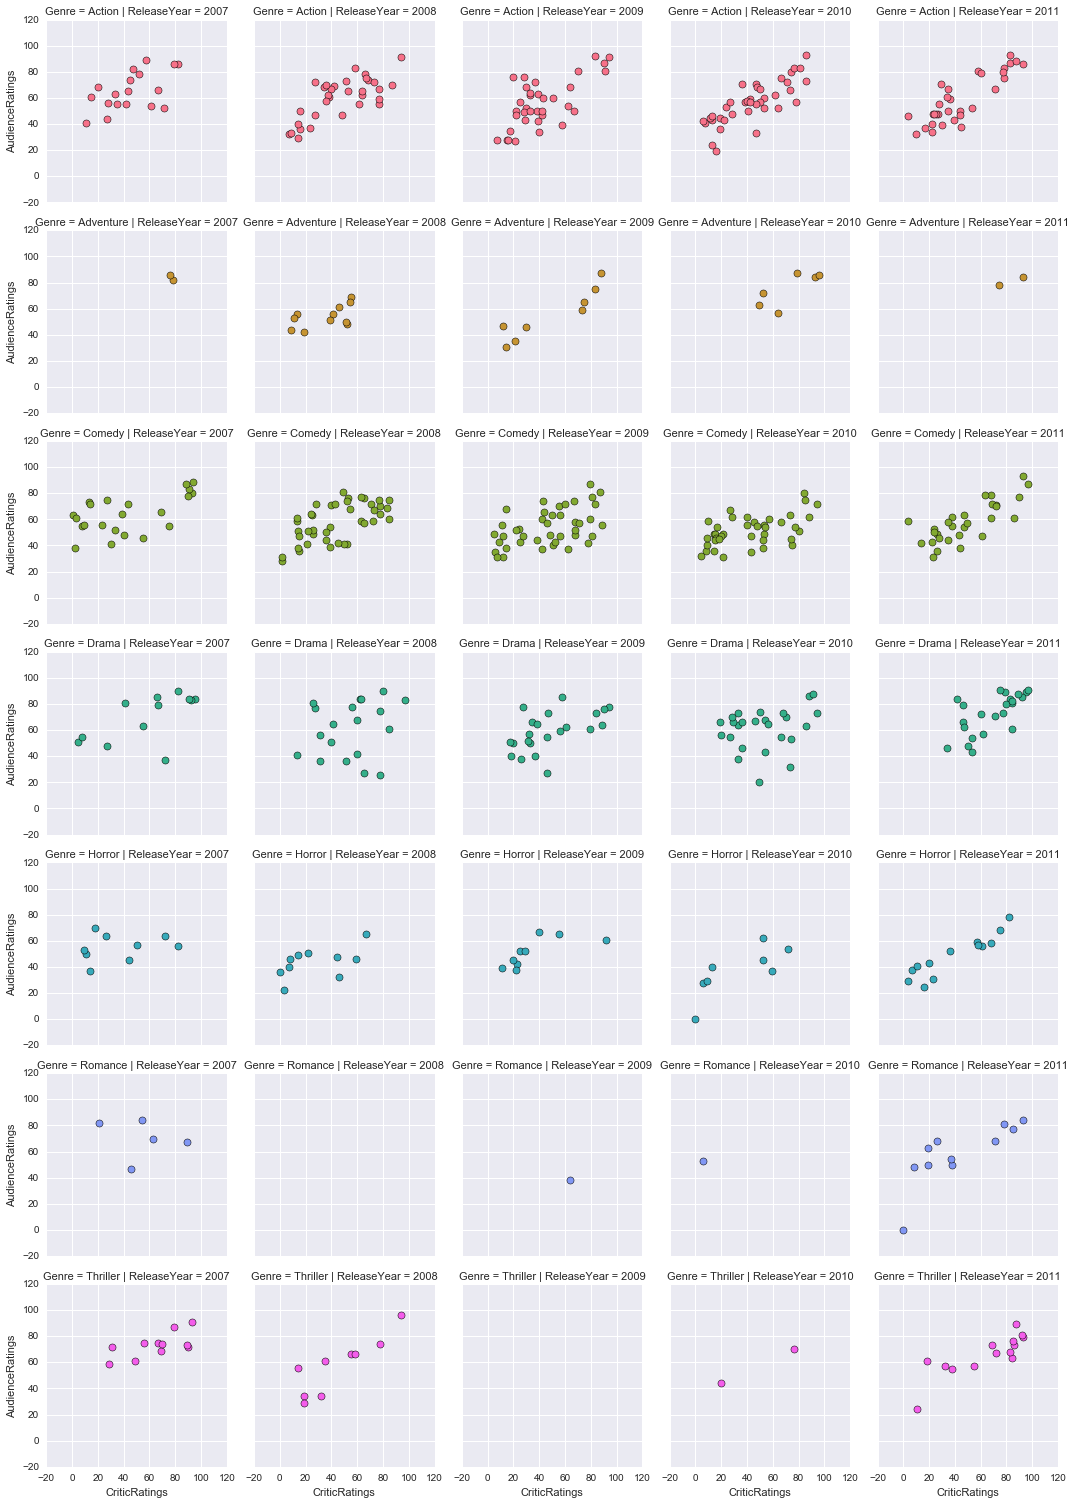

In [43]:
g=sns.FacetGrid(dataset,row='Genre',col='ReleaseYear',hue='Genre')
kws = {'s':50,'edgecolor':'black','linewidth':0.5}
g = g.map(plt.scatter,'CriticRatings','AudienceRatings',**kws)

In [44]:
#Coordinates and diagonals

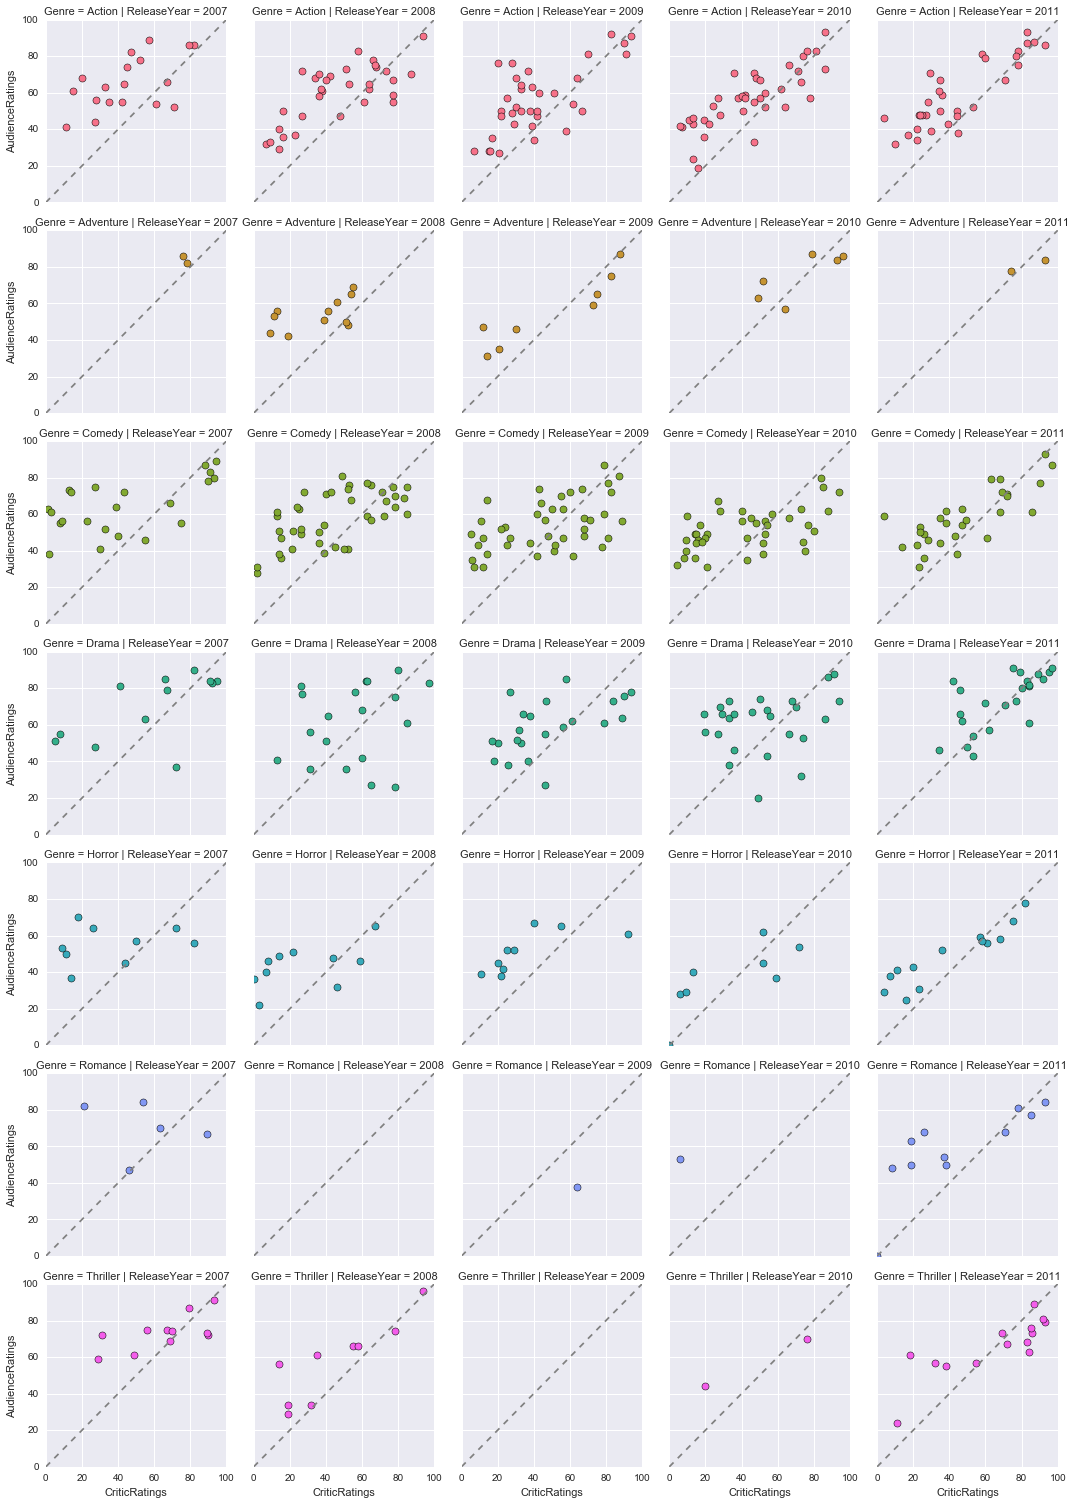

In [45]:
g=sns.FacetGrid(dataset,row='Genre',col='ReleaseYear',hue='Genre')
kws = {'s':50,'edgecolor':'black','linewidth':0.5}
g = g.map(plt.scatter,'CriticRatings','AudienceRatings',**kws)
g.set(xlim=(0,100),ylim=(0,100))
for axes in g.axes.flat:
    axes.plot((0,100),(0,100),c='gray',ls='--')

In [46]:
#Building Dashboard

In [47]:
sns.set_style('darkgrid',{"axes.facecolor": ".9"})
plt.style.use('seaborn')

[(-20, 120)]

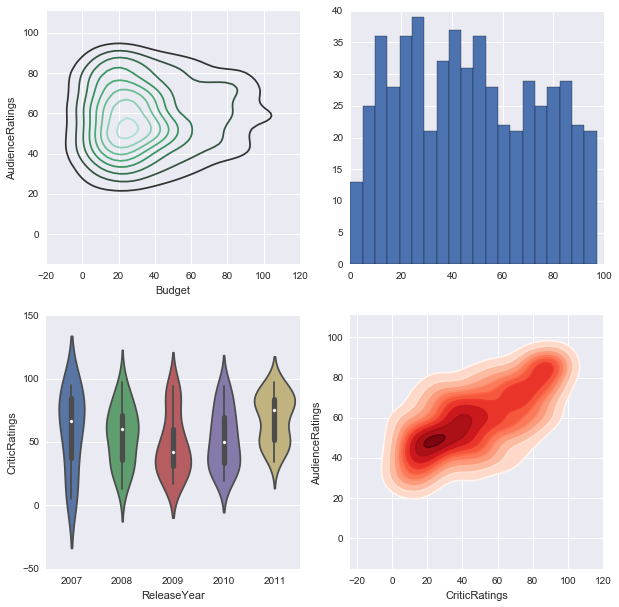

In [51]:
f,axes = plt.subplots(2,2,figsize=(10,10))
k1 = sns.kdeplot(dataset.Budget,dataset.AudienceRatings,ax=axes[0,0])
k2 = axes[0,1].hist(dataset.CriticRatings,bins=20)
k3 = sns.violinplot(data=dataset[dataset.Genre=='Drama'],x='ReleaseYear',y='CriticRatings',ax =axes[1,0])
k4 = sns.kdeplot(dataset.CriticRatings,dataset.AudienceRatings,shade=True,shade_lowest=False,cmap = 'Reds',ax=axes[1,1])
sns.kdeplot(dataset.CriticRatings,dataset.AudienceRatings,cmap = 'Reds',ax=axes[1,1])

k1.set(xlim=(-20,120))

In [19]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

In [52]:
# Styling

In [60]:
sns.set_style('dark',{'axes.facecolor':'black'})

[(-20, 160)]

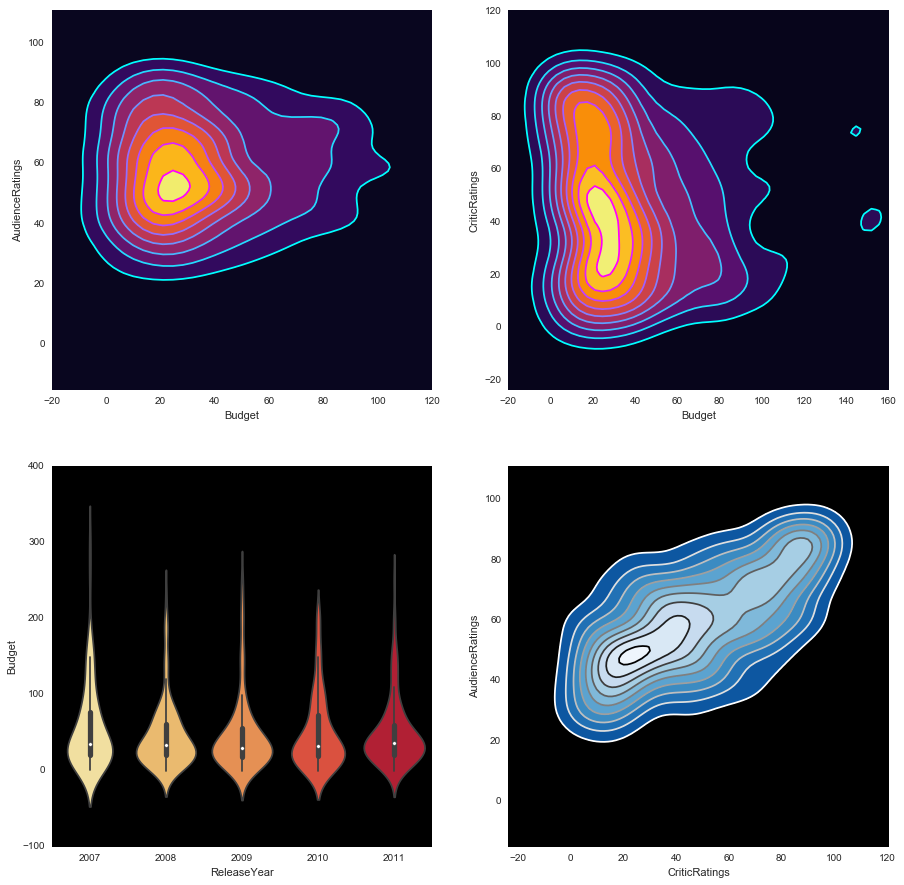

In [73]:
f,axes = plt.subplots(2,2,figsize=(15,15))
k1 = sns.kdeplot(dataset.Budget,dataset.AudienceRatings,ax=axes[0,0],shade=True,shade_lowest=True,cmap='inferno')
k1b = sns.kdeplot(dataset.Budget,dataset.AudienceRatings,ax=axes[0,0],cmap='cool')
k2 = sns.kdeplot(dataset.Budget,dataset.CriticRatings,ax=axes[0,1],shade=True,shade_lowest=True,cmap='inferno')
k2b = sns.kdeplot(dataset.Budget,dataset.CriticRatings,ax=axes[0,1],cmap='cool')
k3 = sns.violinplot(data=dataset,x='ReleaseYear',y='Budget',ax =axes[1,0],palette='YlOrRd')
k4 = sns.kdeplot(dataset.CriticRatings,dataset.AudienceRatings,shade=True,shade_lowest=False,cmap = 'Blues_r',ax=axes[1,1])
k4b = sns.kdeplot(dataset.CriticRatings,dataset.AudienceRatings,cmap = 'gist_gray_r',ax=axes[1,1])

k1.set(xlim=(-20,120))
k2.set(xlim=(-20,160))